In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('churn_prediction.csv')

In [63]:
networth='customer_nw_category'
dslt='days_since_last_transaction'
pmeb='previous_month_end_balance'
ambpq='average_monthly_balance_prevQ'
ambpq2='average_monthly_balance_prevQ2'
cmc='current_month_credit'
pmc='previous_month_credit'
cmd='current_month_debit'
pmd='previous_month_debit'
cmb='current_month_balance'
pmb='previous_month_balance'
cmcd='current_month_credit/debit'
pmcd='previous_month_credit/debit'
mg='monthly_gain'
qg='quartile_gain'
cb='current_balance'
gtm='gain_this_month'
ambc='average_monthly_balance_comparison'
ac='avg_credit'
ad='avg_debit'
amb='avg_monthly_balance'
aqb='avg_quartile_balance'
pmngr='previous_month_net_gain_ratio'
cmngr='current_month_net_gain_ratio'

In [64]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,avg_credit,avg_debit,avg_quartile_balance,avg_monthly_balance,abc,prev_quartile_balance_category,avg_monthly_balance_category,credit_category,current_month_net_gain_ratio,previous_month_net_gain_ratio
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,0.20,0.200,1453.890,1458.7100,"(-7426.0, 2139.0]",Dangerously Low,Dangerously Low,"(0.009000000000000001, 0.41]",0.000000,0.000000
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,0.56,2793.415,10109.335,7344.8550,"(6620.0, 5355230.0]",High,Good,"(0.41, 72.1]",0.844374,-0.612875
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,0.61,3152.980,3863.055,4951.2175,"(3557.0, 6620.0]",Low,Satisfactory,"(0.41, 72.1]",1.207707,-1.141487
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,0.47,1071.900,1545.540,2136.3800,"(-7426.0, 2139.0]",Dangerously Low,Low,"(0.41, 72.1]",0.000000,1.283311
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,357.47,1063.340,1757.215,1290.9375,"(-7426.0, 2139.0]",Dangerously Low,Dangerously Low,"(72.1, 1226.926]",0.508396,0.566100


In [27]:
df.shape

(28382, 25)

In [46]:
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

In [4]:
#Imputing missing gender values
for i in range(len(df)):
    if pd.isnull(df['gender'][i]):
        if df['occupation'][i]=='retired':
            df['gender'][i]='Male'
        elif df['occupation'][i]=='salaried':
            df['gender'][i]='Male'
        elif df['customer_nw_category'][i]==3:
            df['gender'][i]='Male'
        elif df['dependents'][i]>=2:
            df['gender'][i]='Male'
        else:
            df['gender'][i]='Female'

In [5]:
#Convert dependents into categorical
for i in range(len(df)):
    if df['dependents'][i]>2:
        df['dependents'][i]=3
df['dependents'].value_counts()

0.0    21435
2.0     2150
1.0     1395
3.0      939
Name: dependents, dtype: int64

In [64]:
df=df.astype({'dependents':'object','city':'object'})
df['dependents']=df['dependents'].fillna(0)
df['occupation']=df['occupation'].fillna('self_employed')
df['city']=df['city'].fillna(0)

In [7]:
mean_days=np.mean(df['days_since_last_transaction'])
for i in range(len(df)):
    if pd.isnull(df['days_since_last_transaction'][i])==True:
        if df['dependents'][i]==0:
            df['days_since_last_transaction'][i]=74
        elif df['customer_nw_category'][i]==1:
            df['days_since_last_transaction'][i]=56
        elif df['occupation'][i]=='student':
            df['days_since_last_transaction'][i]=92
        else:
            df['days_since_last_transaction'][i]=mean_days

In [28]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             373
dependents                           0
occupation                           0
city                                 0
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       2927
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [11]:
df.shape

(28382, 21)

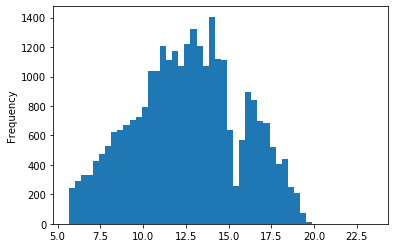

In [12]:
#Normalize the distribution of vintage variable
np.power(df['vintage'],1/3).plot.hist(bins=50)
df['vintage']=np.power(df['vintage'],1/3)

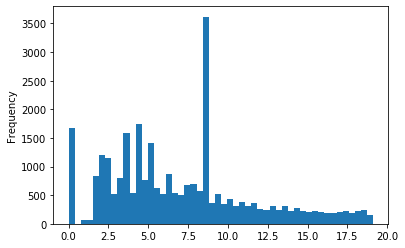

In [47]:
np.sqrt(df['days_since_last_transaction']).plot.hist(bins=50)
df['days_since_last_transaction']=np.sqrt(df['days_since_last_transaction'])

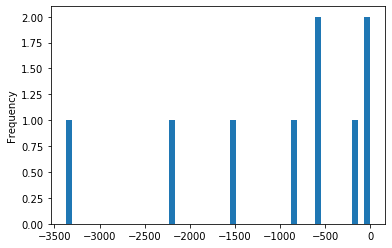

In [20]:
df.loc[df[cmb]<0][cmb].plot.hist(bins=50)

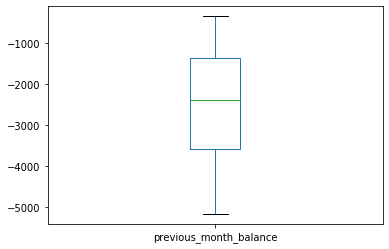

In [23]:
df.loc[df[pmb]<0][pmb].plot.box()

In [52]:
df['current_month_credit/debit']=(df[cmc])/(df[cmd])
df['previous_month_credit/debit']=(df[pmc])/(df[pmd])
df['monthly_gain']=(df[cmb])-(df[pmb])
df['quartile_gain']=df[ambpq]-df[ambpq2]
df['gain_this_month']=df[cb]-df[pmeb]
df['average_monthly_balance_comparison']=(df[cmb]+3500)/(df[pmb]+5500)
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'current_month_gain', 'previous_month_gain', 'monthly_comparison',
       'quartile_comparison', 'expenditure_this_month', 'monthly_comparison_2',
       'current_month_gain2', 'monthly_gain', 'quartile_gain',
       'gain_this_month', 'current_month_credit/debit',
       'previous_month_credit/debit', 'average_monthly_balance_comparison'],
      dtype='object')

In [56]:
df[[cmcd,pmcd,mg,qg,gtm,ambc]]

,current_month_credit/debit,previous_month_credit/debit,monthly_gain,quartile_gain,gain_this_month,average_monthly_balance_comparison
0,1.000000,1.000000,0.00,9.64,0.00,0.712590
1,0.000102,0.005569,-2290.83,-4620.15,-3314.29,0.699682
2,0.000101,0.002353,-63.86,2094.23,-1902.13,0.804746
3,1.000000,0.000219,622.12,1078.00,0.00,0.807821
4,0.000561,0.464618,-520.01,-227.81,-474.00,0.648885
...,...,...,...,...,...,...
28377,1.000000,1.000000,0.00,-505.51,0.00,0.695884
28378,0.001898,0.002258,48.22,-196.72,-225.11,0.787627
28379,27.740831,54.081616,3514.26,31519.00,4494.42,1.024011
28380,1.000000,1.000000,0.00,-174.22,0.00,0.719320


In [54]:
df=df.drop(['monthly_comparison_2','quartile_comparison',
            'current_month_gain','previous_month_gain',
            'monthly_comparison','expenditure_this_month',
            'current_month_gain2'],axis=1)
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'monthly_gain', 'quartile_gain', 'gain_this_month',
       'current_month_credit/debit', 'previous_month_credit/debit',
       'average_monthly_balance_comparison'],
      dtype='object')

In [86]:
df[gtm].describe()

count     28382.000000
mean       -115.218744
std       13821.947904
min     -869454.600000
25%        -376.290000
50%           0.000000
75%         209.712500
max      574712.380000
Name: gain_this_month, dtype: float64

(24758, 27)

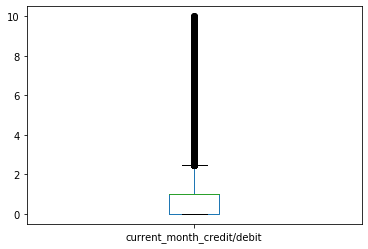

In [60]:
df.loc[df[cmcd]<10][cmcd].plot.box()
df.loc[df[cmcd]<10].shape

(24616, 27)

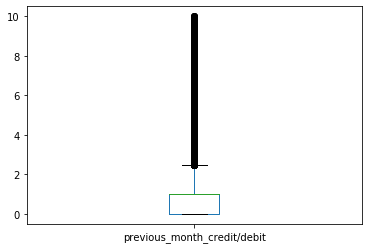

In [62]:
df.loc[df[pmcd]<10][pmcd].plot.box()
df.loc[df[pmcd]<10].shape

(23922, 27)

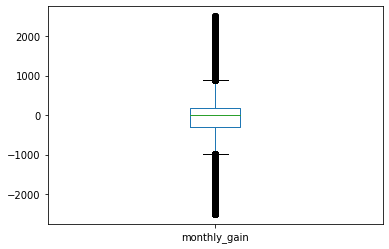

In [74]:
tmp=df.loc[df[mg]<2500]
tmp.loc[tmp[mg]>-2500][mg].plot.box()
tmp.loc[tmp[mg]>-2500].shape

(23746, 27)

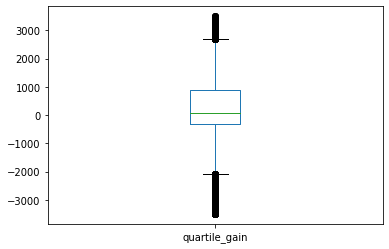

In [82]:
tmp=df.loc[df[qg]<3500]
tmp.loc[tmp[qg]>-3500][qg].plot.box()
tmp.loc[tmp[qg]>-3500].shape

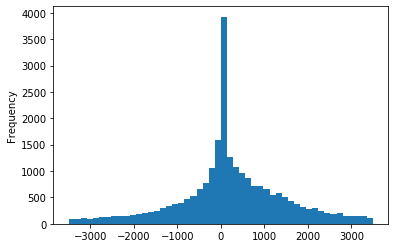

In [84]:
tmp.loc[tmp[qg]>-3500][qg].plot.hist(bins=50)

(23766, 27)

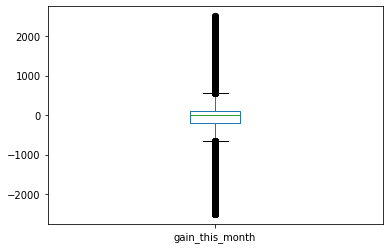

In [89]:
tmp=df.loc[df[gtm]<2500]
tmp.loc[tmp[gtm]>-2500][gtm].plot.box()
tmp.loc[tmp[gtm]>-2500].shape

In [90]:
#gtm,mg,qg are symmetric as a whole but have many outliers

In [11]:
#Now,get rid of outliers using all factors
l=[(cb,12000),(pmeb,12000),(cmc,12000),(ambpq,12000)]
for i in l:
    df=df.loc[df[i[0]]<i[1]]
df

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28376,30296,2155,85,Male,0.0,retired,1589.0,2,389,NaN,...,1741.50,1741.50,1730.46,0.04,0.04,0.04,0.04,1741.50,1741.50,0
28377,30297,1845,10,Female,0.0,student,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,30298,4919,34,Female,0.0,self_employed,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28380,30300,2585,50,Male,3.0,self_employed,1219.0,3,274,NaN,...,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0


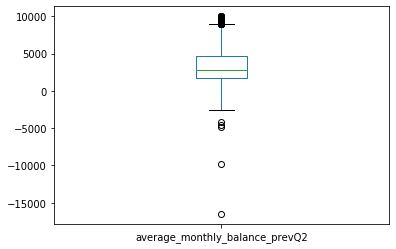

In [106]:
df[ambpq2].plot.box()

In [49]:
#City variable
count=df['city'].value_counts()
df['city'][5]
count[df['city'][5]]

2016

In [65]:
for i in range(len(df)):
    if count[df['city'][i]]<100:
        df['city'][i]=0
    elif count[df['city'][i]]<200:
        df['city'][i]=1
    elif count[df['city'][i]]<300:
        df['city'][i]=2
    elif count[df['city'][i]]<400:
        df['city'][i]=3
    elif count[df['city'][i]]<800:
        df['city'][i]=4
    elif count[df['city'][i]]<1000:
        df['city'][i]=5

In [66]:
df['city'].value_counts()

0.0       9576
1020.0    3479
5.0       2589
4.0       2078
1096.0    2016
2.0       1770
1.0       1767
3.0       1344
409.0     1334
146.0     1291
834.0     1138
Name: city, dtype: int64

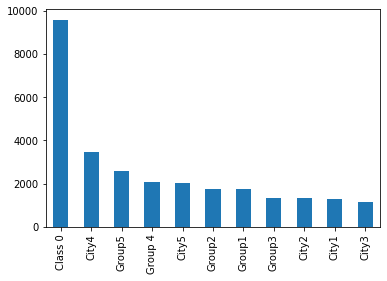

In [80]:
df=df.astype({'city':'object'})
df['city']=df['city'].replace({0:'Group0',1:'Group1',2:'Group2',3:'Group3',4:'Group4',5:'Group5',
                              146:'City1',409:'City2',834:'City3',1020:'City4',1096:'City5'})
df['city'].value_counts().plot.bar()

In [83]:
l=['Class 0','Group1','Group2','Group3','Group 4','Group5','City1','City2','City3','City4','City5']
for i in l:
    print('Analysis of ',i,'\n')
    print(df[df['city']==i]['churn'].value_counts()/len(df[df['city']==i])*100,'\n')

Analysis of  Class 0 

0    80.179616
1    19.820384
Name: churn, dtype: float64 

Analysis of  Group1 

0    82.116582
1    17.883418
Name: churn, dtype: float64 

Analysis of  Group2 

0    81.694915
1    18.305085
Name: churn, dtype: float64 

Analysis of  Group3 

0    83.407738
1    16.592262
Name: churn, dtype: float64 

Analysis of  Group 4 

0    80.413859
1    19.586141
Name: churn, dtype: float64 

Analysis of  Group5 

0    80.726149
1    19.273851
Name: churn, dtype: float64 

Analysis of  City1 

0    82.649109
1    17.350891
Name: churn, dtype: float64 

Analysis of  City2 

0    83.208396
1    16.791604
Name: churn, dtype: float64 

Analysis of  City3 

0    81.72232
1    18.27768
Name: churn, dtype: float64 

Analysis of  City4 

0    82.466226
1    17.533774
Name: churn, dtype: float64 

Analysis of  City5 

0    83.779762
1    16.220238
Name: churn, dtype: float64 



In [5]:
#Checking out new categorical variables
df['avg_credit']=(df[cmc]+df[pmc])/2
df['avg_debit']=(df[cmd]+df[pmd])/2
df['avg_quartile_balance']=(df[ambpq]+df[ambpq2])/2
df['avg_monthly_balance']=(df[cmb]+df[pmb]+df[pmeb]+df[cb])/4
df[['avg_credit','avg_debit','avg_quartile_balance','avg_monthly_balance']]

,avg_credit,avg_debit,avg_quartile_balance,avg_monthly_balance
0,0.200,0.200,1453.890,1458.7100
1,0.560,2793.415,10109.335,7344.8550
2,0.610,3152.980,3863.055,4951.2175
3,0.470,1071.900,1545.540,2136.3800
4,357.470,1063.340,1757.215,1290.9375
...,...,...,...,...
28377,0.300,0.300,2534.945,1076.4300
28378,2.000,957.535,3767.190,3835.5425
28379,4274.950,120.015,37685.310,61293.0650
28380,0.200,0.200,1770.310,1625.5500


5355229.835

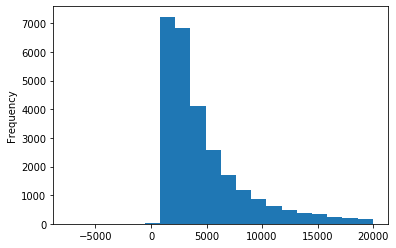

In [35]:
df.loc[df[aqb]<20000][aqb].plot.hist(bins=20)
df.loc[df[aqb]<10000].shape
df[aqb].max()

In [53]:
bin=[-10000,2000,5000,10000,6000000]
label=['Dangerously Low','Low','Satisfactory','High']
df['prev_quartile_balance_category']=pd.cut(df[aqb],bins=bin,labels=label)
df['prev_quartile_balance_category'].value_counts()

Low                12225
Dangerously Low     6206
Satisfactory        5870
High                4081
Name: prev_quartile_balance_category, dtype: int64

In [51]:
label=['Dangerously Low','Low','Satisfactory','Good']
df['avg_monthly_balance_category']=pd.qcut(df[amb],q=4,precision=0,labels=label)
df['avg_monthly_balance_category'].value_counts()

Good               7096
Dangerously Low    7096
Satisfactory       7095
Low                7095
Name: avg_monthly_balance_category, dtype: int64

In [57]:
pd.crosstab(df['prev_quartile_balance_category'],df['churn'])

churn,0,1
prev_quartile_balance_category,,
Dangerously Low,4986,1220
Low,10162,2063
Satisfactory,4771,1099
High,3203,878


In [52]:
pd.crosstab(df['avg_monthly_balance_category'],df['churn'])

churn,0,1
avg_monthly_balance_category,,
Dangerously Low,5210,1886
Low,6023,1072
Satisfactory,5991,1104
Good,5898,1198


In [81]:
df['current_month_net_gain_ratio']=(df[cmd]-df[cmc])/df[cmb]
df['previous_month_net_gain_ratio']=(df[pmd]-df[cmd])/df[pmb]
df[['previous_month_net_gain_ratio','current_month_net_gain_ratio']]

,previous_month_net_gain_ratio,current_month_net_gain_ratio
0,0.000000,0.000000
1,-0.612875,0.844374
2,-1.141487,1.207707
3,1.283311,0.000000
4,0.566100,0.508396
...,...,...
28377,0.000000,0.000000
28378,0.030640,0.240546
28379,-0.001675,-0.073653
28380,0.000000,0.000000


(26676, 31)

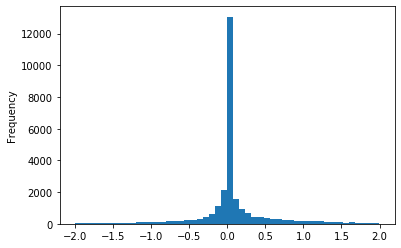

In [71]:
tmp=df.loc[df[cmngr]<2]
tmp.loc[tmp[cmngr]>-2][cmngr].plot.hist(bins=50)
tmp.loc[tmp[cmngr]>-2].shape

(26617, 31)

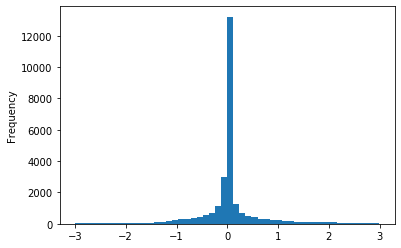

In [73]:
tmp=df.loc[df[pmngr]<3]
tmp.loc[tmp[pmngr]>-3][pmngr].plot.hist(bins=50)
tmp.loc[tmp[pmngr]>-3].shape